# Import Libraries

In [3]:
#import urllib2
from io import StringIO
import os
import xmltodict
import pandas as pd
import geopandas as gpd
import windrose

from datetime import datetime 
import statsmodels.api as sm

from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import sys
import requests
import glob

from pyproj import CRS
from pyproj import Transformer
from shapely.geometry import Point

import rasterstats as rs
import rasterio

from rasterio.plot import show
from rasterio.mask import mask
from rasterio.plot import show_hist
from shapely.geometry import box
from rasterstats import zonal_stats
from windrose import WindroseAxes
#import pycrs
#import earthpy as et
#import earthpy.plot as ep

from scipy.optimize import curve_fit

from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl


#import pymannkendall as mk
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10

from windrose import WindroseAxes
import geopandas as gpd
import windrose
import pandas as pd
import glob
import os

# Define Header Data

In [4]:
met30_variable_descript = {"TIMESTAMP":["Timestamp",""],
                    "RECORD":["Record Number",""],
                    "BattV_Min":["Minimum Battery Voltage", "V"],
                    "VWC_5cm_N_Avg":["Average Volumetric Water Content North 5 cm Depth", "m3/m3"],
                    "VWC_5cm_S_Avg":["Average Volumetric Water Content South 5 cm Depth", "m3/m3"],
                    "Ka_5cm_N_Avg":["Average Relative Dielectric Permittivity North 5 cm Depth", ""],
                    "T_5cm_N_Avg":["Average Soil Temperature North 5 cm Depth", "C"],
                    "BulkEC_5cm_N_Avg":["Average Soil Conductivity North 5 cm Depth", "dS/m"],
                    "VWC_10cm_N_Avg":["Average Volumetric Water Content North 10 cm Depth", "m3/m3"],
                    "Ka_10cm_N_Avg":["Average Relative Dielectric Permittivity North 10 cm Depth", ""],
                    "T_10cm_N_Avg":["Average Soil Temperature North 10 cm Depth", "C"],
                    "BulkEC_10cm_N_Avg":["Average Soil Conductivity North 10 cm Depth", "dS/m"],
                    "VWC_20cm_N_Avg":["Average Volumetric Water Content North 20 cm Depth", "m3/m3"],
                    "Ka_20cm_N_Avg":["Average Relative Dielectric Permittivity North 20 cm Depth", ""],
                    "T_20cm_N_Avg":["Average Soil Temperature North 20 cm Depth", "C"],
                    "BulkEC_20cm_N_Avg":["Average Soil Conductivity North 20 cm Depth", "dS/m"],
                    "VWC_30cm_N_Avg":["Average Volumetric Water Content North 30 cm Depth", "m3/m3"],
                    "Ka_30cm_N_Avg":["Average Relative Dielectric Permittivity North 30 cm Depth", ""],
                    "T_30cm_N_Avg":["Average Soil Temperature North 30 cm Depth", "C"],
                    "BulkEC_30cm_N_Avg":["Average Soil Conductivity North 30 cm Depth", "dS/m"],
                    "VWC_40cm_N_Avg":["Average Volumetric Water Content North 40 cm Depth", "m3/m3"],
                    "Ka_40cm_N_Avg":["Average Relative Dielectric Permittivity North 40 cm Depth", ""],
                    "T_40cm_N_Avg":["Average Soil Temperature North 40 cm Depth", "C"],
                    "BulkEC_40cm_N_Avg":["Average Soil Conductivity North 40 cm Depth", "dS/m"],
                    "VWC_50cm_N_Avg":["Average Volumetric Water Content North 50 cm Depth", "m3/m3"],
                    "Ka_50cm_N_Avg":["Average Relative Dielectric Permittivity North 50 cm Depth", ""],
                    "T_50cm_N_Avg":["Average Soil Temperature North 50 cm Depth", "C"],
                    "BulkEC_50cm_N_Avg":["Average Soil Conductivity North 50 cm Depth", "dS/m"],
                    "VWC_60cm_N_Avg":["Average Volumetric Water Content North 60 cm Depth", "m3/m3"],
                    "Ka_60cm_N_Avg":["Average Relative Dielectric Permittivity North 60 cm Depth", ""],
                    "T_60cm_N_Avg":["Average Soil Temperature North 60 cm Depth", "C"],
                    "BulkEC_60cm_N_Avg":["Average Soil Conductivity North 60 cm Depth", "dS/m"],
                    "VWC_75cm_N_Avg":["Average Volumetric Water Content North 75 cm Depth", "m3/m3"],
                    "Ka_75cm_N_Avg":["Average Relative Dielectric Permittivity North 75 cm Depth", ""],
                    "T_75cm_N_Avg":["Average Soil Temperature North 75 cm Depth", "C"],
                    "BulkEC_75cm_N_Avg":["Soil Conductivity North 75 cm Depth", "dS/m"],
                    "VWC_100cm_N_Avg":["Average Volumetric Water Content North 100 cm Depth", "m3/m3"],
                    "Ka_100cm_N_Avg":["Average Relative Dielectric Permittivity North 100 cm Depth", ""],
                    "T_100cm_N_Avg":["Average Soil Temperature North 100 cm Depth", "C"],
                    "BulkEC_100cm_N_Avg":["Average Soil Conductivity North 100 cm Depth", "dS/m"],
                    "Ka_5cm_S_Avg":["Average Relative Dielectric Permittivity South 5 cm Depth", ""],
                    "T_5cm_S_Avg":["Average Soil Temperature South 5 cm Depth", "C"],
                    "BulkEC_5cm_S_Avg":["Average Soil Conductivity South 5 cm Depth", "dS/m"],
                    "VWC_10cm_S_Avg":["Average Volumetric Water Content South 10 cm Depth", "m3/m3"],
                    "Ka_10cm_S_Avg":["Average Relative Dielectric Permittivity South 10 cm Depth", ""],
                    "T_10cm_S_Avg":["Average Soil Temperature South 10 cm Depth", "C"],
                    "BulkEC_10cm_S_Avg":["Average Soil Conductivity South 10 cm Depth", "dS/m"],
                    "VWC_20cm_S_Avg":["Average Volumetric Water Content South 20 cm Depth", "m3/m3"],
                    "Ka_20cm_S_Avg":["Average Relative Dielectric Permittivity South 20 cm Depth", ""],
                    "T_20cm_S_Avg":["Average Soil Temperature South 20 cm Depth", "C"],
                    "BulkEC_20cm_S_Avg":["Average Soil Conductivity South 20 cm Depth", "dS/m"],
                    "VWC_30cm_S_Avg":["Average Volumetric Water Content South 30 cm Depth", "m3/m3"],
                    "Ka_30cm_S_Avg":["Average Relative Dielectric Permittivity South 30 cm Depth", ""],
                    "T_30cm_S_Avg":["Average Soil Temperature South 30 cm Depth", "C"],
                    "BulkEC_30cm_S_Avg":["Average Soil Conductivity South 30 cm Depth", "dS/m"],
                    "VWC_40cm_S_Avg":["Average Volumetric Water Content South 40 cm Depth", "m3/m3"],
                    "Ka_40cm_S_Avg":["Average Relative Dielectric Permittivity South 40 cm Depth", ""],
                    "T_40cm_S_Avg":["Average Soil Temperature South 40 cm Depth", "C"],
                    "BulkEC_40cm_S_Avg":["Average Soil Conductivity South 40 cm Depth", "dS/m"],
                    "VWC_50cm_S_Avg":["Average Volumetric Water Content South 50 cm Depth", "m3/m3"],
                    "Ka_50cm_S_Avg":["Average Relative Dielectric Permittivity South 50 cm Depth", ""],
                    "T_50cm_S_Avg":["Average Soil Temperature South 50 cm Depth", "C"],
                    "BulkEC_50cm_S_Avg":["Average Soil Conductivity South 50 cm Depth", "dS/m"],
                    "VWC_60cm_S_Avg":["Average Volumetric Water Content South 60 cm Depth", "m3/m3"],
                    "Ka_60cm_S_Avg":["Average Relative Dielectric Permittivity South 60 cm Depth", ""],
                    "T_60cm_S_Avg":["Average Soil Temperature South 60 cm Depth", "C"],
                    "BulkEC_60cm_S_Avg":["Average Soil Conductivity South 60 cm Depth", "dS/m"],
                    "VWC_75cm_S_Avg":["Average Volumetric Water Content South 75 cm Depth", "m3/m3"],
                    "Ka_75cm_S_Avg":["Average Relative Dielectric Permittivity South 75 cm Depth", ""],
                    "T_75cm_S_Avg":["Average Soil Temperature South 75 cm Depth", "C"],
                    "BulkEC_75cm_S_Avg":["Average Soil Conductivity South 75 cm Depth", "dS/m"],
                    "VWC_100cm_S_Avg":["Average Volumetric Water Content South 100 cm Depth", "m3/m3"],
                    "Ka_100cm_S_Avg":["Average Relative Dielectric Permittivity South 100 cm Depth", ""],
                    "T_100cm_S_Avg":["Average Soil Temperature South 100 cm Depth", "C"],
                    "BulkEC_100cm_S_Avg":["Average Soil Conductivity South 100 cm Depth", "dS/m"],
                    "Rain_in_Tot":["Total Precipitation", "in"],
                    "CS320_Temp_Avg":["CS320 Average Temperature", "C"],
                    "DewPtC_Avg":["Dew Point Temperature","C",],
                    "SHF_South_Avg":["Check1234", ""],
                    "SHF_North_Avg":["Check1234", ""],
                    "AirTC_Avg":["Average Air Temperature", "C"],
                    "RH":["Relative Humidity", "%"],
                    "BP_mbar_Avg":["Average Barometric Pressure", "mbar"],
                    "VWC_N_Avg":["Average Volumetric Water Content North Pit", "m3/m3"],
                    "EC_N_Avg":["Average Soil Conductivity North Pit", "dS/m"],
                    "T_N_Avg":["Average Soil Temperature North Pit", "C"],
                    "P_N_Avg":["Check1234", ""],
                    "PA_N_Avg":["Check1234", ""],
                    "VR_N_Avg":["Check1234", ""],
                    "VWC_S_Avg":["Average Volumetric Water Content South Pit", "m3/m3"],
                    "EC_S_Avg":["Average Soil Conductivity South Pit", "dS/m"],
                    "T_S_Avg":["Average Soil Temperature South Pit", "C"],
                    "P_S_Avg":["Check1234", ""],
                    "PA_S_Avg":["Check1234", ""],
                    "VR_S_Avg":["Check1234", ""],
                    "SWTop_Avg":["Short Wave In", "W/m2"],
                    "SWBottom_Avg":["Short Wave Out", "W/m2"],
                    "LWTop_Avg":["Long Wave In", "W/m2"],
                    "LWBottom_Avg":["Average Long Wave Out", "W/m2"],
                    "cnr4_T_C_Avg":["CNR4 Average Temperature", "C"],
                    "cnr4_T_K_Avg":["CNR4 Average Temperature", "K"],
                    "LWTopC_Avg":["Check1234", ""],
                    "LWBottomC_Avg":["Check1234", ""],
                    "Rs_net_Avg":["Average Net Shortwave Radiation", "W/m2"],
                    "Rl_net_Avg":["Average Net Shortwave Radiation", "W/m2"],
                    "albedo_Avg":["Average Albedo", "%"],
                    "Rn_Avg":["Average Radiation", "W/m2"],
                    "kh_mV_Avg":["Check1234", ""],
                    "ln_kh_Avg":["Check1234", ""],
                    "Lvl_ft":["Water Level", "ft"],
                    "Temp_C":["Check1234", ""],
                    "Lvl_corr":["Water Level Correction", "ft"],
                    "Lvl_ft_Min":["Minimum Water Level", "ft"],
                    "Lvl_ft_TMn":["Minimum Water Level Time", ""],
                    "Lvl_ft_Max":["Maximum Water Level", "ft"],
                    "Lvl_ft_TMx":["Maximum Water Level Time", ""],
                    "Ts_Avg":["Check1234", ""],
                    "Ts_Std":["Check1234", ""],
                    "Ux_Avg":["Average X-Dir Windspeed", "m/s"],
                    "Ux_Std":["Standard Deviation X-Dir Windspeed", "m/s"],
                    "Uy_Avg":["Average Y-Dir Windspeed", "m/s"],
                    "Uy_Std":["Standard Deviation Y-Dir Windspeed", "m/s"],
                    "Uz_Avg":["Average Z-Dir Windspeed", "m/s"],
                    "Uz_Std":["Standard Deviation Z-Dir Windspeed", "m/s"],
                    "wind_dir_compass":["Compass Wind Direction", "degrees"],
                    "wind_dir_csat":["CSAT Wind Direction", "degrees"],
                    "wind_speed":["Windspeed", "m/s"],
                    "result_wind_speed":["Result Wind Speed","m/s"],
                    "standard_wind_dir":["Standard Wind Direction", "degrees"],
                    "Anonymous1_Tot":["Check1234", ""],
                    "csat_warnings":["CSAT Warnings", ""],
                    "Flag_LowAmp_Tot":["Low Amp Flag", ""],
                    "Flag_HighAmp_Tot":["High Amp Flag", ""],
                    "Flag_Tracking_Tot":["Tracking Flag", ""],
                    "Flag_HighDeltaC_Tot":["High Delta C", ""],
                    "Flag_Acq_Tot":["Acq Flag", ""],
                    "Flag_LowVolt_Tot":["Low Voltage Flag", ""],
                    "Flag_MemErr_Tot":["Memory Error Flag", ""],
                    "Flag_InternalRH_Tot":["Internal RH Flag", ""],
                    "Flag_TrigErr_Tot":["Trig Error Flag", ""],
                    "board_temp_Avg":["Board Temperature", "C"],
                    "board_humidity_Avg":["Board Humidity", "%"],
                    "incline_pitch_Avg":["Average Incline Pitch", "degrees"],
                    "incline_roll_Avg":["Average Incline Roll", "degrees"]}
                                          
public_variable_descript = {"TIMESTAMP":["Timestamp",""],
                    "RECORD":["Record Number",""],
                    "BattV":["Battery Voltage", "V"],
                    "PTemp_C":["Panel Temperature", "C"],
                    "AirTC":["Air Temperature", "C"],
                    "RH":["Relative Humidity", "%"],
                    "DewPtC":["Dew Point", "C"],
                    "BP_mbar":["Barometric Pressure", "mbar"],
                    "Rain_in":["Precipitation","in"],
                    "TT_C":["Check1234", ""],
                    "SBT_C":["Check1234", ""],
                    "TTmV":["Check1234", ""],
                    "Lvl_ft":["Water Level", "ft"],
                    "Temp_C":["Check1234", ""],
                    "Observed":["Check1234", ""],
                    "Lvl_corr":["Water Level Correction", "ft"],
                    "Offset":["Check1234", ""],
                    "Ux":["X-Dir Wind Speed", "m/s"],
                    "Uy":["Y-Dir Wind Speed", "m/s"],
                    "Uz":["Z-Dir Wind Speed", "m/s"],
                    "Ts":["Check1234", ""],
                    "diag":["Check1234", ""],
                    "board_temp":["Board Temperature", "C"],
                    "board_humidity":["Board Humidity", "%"],
                    "incline_pitch":["Incline Pitch", "degrees"],
                    "incline_roll":["Incline Roll", "degrees"],
                    "Flag_LowAmp":["Low Amp Flag", ""],
                    "Flag_HighAmp":["High Amp Flag", ""],
                    "Flag_Tracking":["Tracking Flag", ""],
                    "Flag_HighDeltaC":["High Delta C Flag", ""],
                    "Flag_Acq":["Acq Flag", ""],
                    "Flag_LowVolt":["Low Voltage Flag", ""],
                    "Flag_TrigErr":["Trig Error Flag", ""],
                    "Flag_InternalRH":["Internal RH Flag", ""],
                    "Flag_MemErr":["Memory Error Flag", ""],
                    "wind_out(1)":["Wind Out 1", ""],
                    "wind_out(2)":["Wind Out 2", ""],
                    "wind_dir_compass":["Compass Wind Direction", "degrees"],
                    "wind_out(4)":["Wind Out 4", ""],
                    "wind_speed":["Wind Speed", "m/s"],
                    "result_wind_speed":["Result Wind Speed", "m/s"],
                    "wind_dir_csat":["CSAT Wind Direction", "degrees"],
                    "standard_wind_dir":["Standard Wind Direction", "degrees"],
                    "SWTop":["Short Wave In", "W/m2"],
                    "SWBottom":["Short Wave Out", "W/m2"],
                    "LWTop":["Long Wave In", "W/m2"],
                    "LWBottom":["Long Wave Out", "W/m2"],
                    "cnr4_T_C":["CNR4 Temperature", "C"],
                    "cnr4_T_K":["CNR4 Temperature", "K"],
                    "LWTopC":["Check1234", ""],
                    "LWBottomC":["Check1234", ""],
                    "Rs_net":["Net Short Wave Radiation", "W/m2"],
                    "Rl_net":["Net Long Wave Radiation", "W/m2"],
                    "albedo":["Albedo", "%"],
                    "Rn":["Net Radiation", "W/m2"],
                    "cnr4_mult(1)":["Check1234", ""],
                    "cnr4_mult(2)":["Check1234", ""],
                    "cnr4_mult(3)":["Check1234", ""],
                    "cnr4_mult(4)":["Check1234", ""],
                    "kh_mV":["Check1234", ""],
                    "ln_kh":["Check1234", ""],
                    "rho_w":["Check1234", ""],
                    "SlrW":["Check1234", ""],
                    "Raw_mV":["Check1234", ""],
                    "CS320_Temp":["CS320 Temperature", "C"],
                    "CS320_X":["X Wind Direction", "degrees"],
                    "CS320_Y":["Y Wind Direction", "degrees"],
                    "CS320_Z":["Z Wind Direction", "degrees"],
                    "SHF_South":["Check1234", ""],
                    "SHF_North":["Check1234", ""],
                    "VWC_N":["Volumetric Water Content North Pit", "m3/m3"],
                    "EC_N":["Soil Conductivity North Pit", "dS/m"],
                    "T_N":["Temperature North Pit", "C"],
                    "P_N":["Check1234", ""],
                    "PA_N":["Check1234", ""],
                    "VR_N":["Check1234", ""],
                    "VWC_S":["Volumetric Water Content South Pit", "m3/m3"],
                    "EC_S":["Soil Conductivity South Pit", "dS/m"],
                    "T_S":["Temperature South Pit", "C"],
                    "P_S":["Check1234", ""],
                    "PA_S":["Check1234", ""],
                    "VR_S":["Check1234", ""],
                    "Temp_C_N":["Check1234", ""],
                    "Temp_C_S":["Check1234", ""],
                    "VWC_5cm_N":["Volumetric Water Content North 5 cm Depth", "m3/m3"],
                    "Ka_5cm_N":["Relative Dielectric Permittivity North 5 cm Depth", ""],
                    "T_5cm_N":["Temperature North 5 cm Depth", "C"],
                    "BulkEC_5cm_N":["Soil Conductivity North 5 cm Depth", "dS/m"],
                    "VWC_10cm_N":["Volumetric Water Content North 10 cm Depth", "m3/m3"],
                    "Ka_10cm_N":["Relative Dielectric Permittivity North 10 cm Depth", ""],
                    "T_10cm_N":["Temperature North 10 cm Depth", "C"],
                    "BulkEC_10cm_N":["Soil Conductivity North 10 cm Depth", "dS/m"],
                    "VWC_20cm_N":["Volumetric Water Content North 20 cm Depth", "m3/m3"],
                    "Ka_20cm_N":["Relative Dielectric Permittivity North 20 cm Depth", ""],
                    "T_20cm_N":["Temperature North 20 cm Depth", "C"],
                    "BulkEC_20cm_N":["Soil Conductivity North 20 cm Depth", "dS/m"],
                    "VWC_30cm_N":["Volumetric Water Content North 30 cm Depth", "m3/m3"],
                    "Ka_30cm_N":["Relative Dielectric Permittivity North 30 cm Depth", ""],
                    "T_30cm_N":["Temperature North 30 cm Depth", "C"],
                    "BulkEC_30cm_N":["Soil Conductivity North 30 cm Depth", "dS/m"],
                    "VWC_40cm_N":["Volumetric Water Content North 40 cm Depth", "m3/m3"],
                    "Ka_40cm_N":["Relative Dielectric Permittivity North 40 cm Depth", ""],
                    "T_40cm_N":["Temperature North 40 cm Depth", "C"],
                    "BulkEC_40cm_N":["Soil Conductivity North 40 cm Depth", "dS/m"],
                    "VWC_50cm_N":["Volumetric Water Content North 50 cm Depth", "m3/m3"],
                    "Ka_50cm_N":["Relative Dielectric Permittivity North 50 cm Depth", ""],
                    "T_50cm_N":["Temperature North 50 cm Depth", "C"],
                    "BulkEC_50cm_N":["Soil Conductivity North 50 cm Depth", "dS/m"],
                    "VWC_60cm_N":["Volumetric Water Content North 60 cm Depth", "m3/m3"],
                    "Ka_60cm_N":["Relative Dielectric Permittivity North 60 cm Depth", ""],
                    "T_60cm_N":["Temperature North 60 cm Depth", "C"],
                    "BulkEC_60cm_N":["Soil Conductivity North 60 cm Depth", "dS/m"],
                    "VWC_75cm_N":["Volumetric Water Content North 75 cm Depth", "m3/m3"],
                    "Ka_75cm_N":["Relative Dielectric Permittivity North 75 cm Depth", ""],
                    "T_75cm_N":["Temperature North 75 cm Depth", "C"],
                    "BulkEC_75cm_N":["Soil Conductivity North 75 cm Depth", "dS/m"],
                    "VWC_100cm_N":["Volumetric Water Content North 100 cm Depth", "m3/m3"],
                    "Ka_100cm_N":["Relative Dielectric Permittivity North 100 cm Depth", ""],
                    "T_100cm_N":["Temperature North 100 cm Depth", "C"],
                    "BulkEC_100cm_N":["Soil Conductivity North 100 cm Depth", "dS/m"],
                    "VWC_5cm_S":["Volumetric Water Content South 5 cm Depth", "m3/m3"],
                    "Ka_5cm_S":["Relative Dielectric Permittivity South 5 cm Depth", ""],
                    "T_5cm_S":["Temperature South 5 cm Depth", "C"],
                    "BulkEC_5cm_S":["Soil Conductivity South 5 cm Depth", "dS/m"],
                    "VWC_10cm_S":["Volumetric Water Content South 10 cm Depth", "m3/m3"],
                    "Ka_10cm_S":["Relative Dielectric Permittivity South 10 cm Depth", ""],
                    "T_10cm_S":["Temperature South 10 cm Depth", "C"],
                    "BulkEC_10cm_S":["Soil Conductivity South 10 cm Depth", "dS/m"],
                    "VWC_20cm_S":["Volumetric Water Content South 20 cm Depth", "m3/m3"],
                    "Ka_20cm_S":["Relative Dielectric Permittivity South 20 cm Depth", ""],
                    "T_20cm_S":["Temperature South 20 cm Depth", "C"],
                    "BulkEC_20cm_S":["Soil Conductivity South 20 cm Depth", "dS/m"],
                    "VWC_30cm_S":["Volumetric Water Content South 30 cm Depth", "m3/m3"],
                    "Ka_30cm_S":["Relative Dielectric Permittivity South 30 cm Depth", ""],
                    "T_30cm_S":["Temperature South 30 cm Depth", "C"],
                    "BulkEC_30cm_S":["Soil Conductivity South 30 cm Depth", "dS/m"],
                    "VWC_40cm_S":["Volumetric Water Content South 40 cm Depth", "m3/m3"],
                    "Ka_40cm_S":["Relative Dielectric Permittivity South 40 cm Depth", ""],
                    "T_40cm_S":["Temperature South 40 cm Depth", "C"],
                    "BulkEC_40cm_S":["Soil Conductivity South 40 cm Depth", "dS/m"],
                    "VWC_50cm_S":["Volumetric Water Content South 50 cm Depth", "m3/m3"],
                    "Ka_50cm_S":["Relative Dielectric Permittivity South 50 cm Depth", ""],
                    "T_50cm_S":["Temperature South 50 cm Depth", "C"],
                    "BulkEC_50cm_S":["Soil Conductivity South 50 cm Depth", "dS/m"],
                    "VWC_60cm_S":["Volumetric Water Content South 60 cm Depth", "m3/m3"],
                    "Ka_60cm_S":["Relative Dielectric Permittivity South 60 cm Depth", ""],
                    "T_60cm_S":["Temperature South 60 cm Depth", "C"],
                    "BulkEC_60cm_S":["Soil Conductivity South 60 cm Depth", "dS/m"],
                    "VWC_75cm_S":["Volumetric Water Content South 75 cm Depth", "m3/m3"],
                    "Ka_75cm_S":["Relative Dielectric Permittivity South 75 cm Depth", ""],
                    "T_75cm_S":["Temperature South 75 cm Depth", "C"],
                    "BulkEC_75cm_S":["Soil Conductivity South 75 cm Depth", "dS/m"],
                    "VWC_100cm_S":["Volumetric Water Content South 100 cm Depth", "m3/m3"],
                    "Ka_100cm_S":["Relative Dielectric Permittivity South 100 cm Depth", ""],
                    "T_100cm_S":["Temperature South 100 cm Depth", "C"],
                    "BulkEC_100cm_S":["Soil Conductivity South 100 cm Depth", "dS/m"]}

                                          
                                          
                                          
renm_met30 = {}
for key,value in met30_variable_descript.items():
    renm_met30[key] = value[0]
    
descriptors_met30 = pd.DataFrame(met30_variable_descript).T #flips table
descriptors_met30.loc['et'] = ['evapotranspiration','mm/hr'] #adds et  
                  
    
renm_public = {}
for key,value in public_variable_descript.items():
    renm_public[key] = value[0]
    
descriptors_public = pd.DataFrame(public_variable_descript).T
descriptors_public.loc['et'] = ['evapotranspiration','mm/hr']

In [5]:
met30_header_cols = ["TIMESTAMP","RECORD","BattV_Min","VWC_5cm_N_Avg","VWC_5cm_S_Avg","Ka_5cm_N_Avg","T_5cm_N_Avg",
                     "BulkEC_5cm_N_Avg","VWC_10cm_N_Avg","Ka_10cm_N_Avg","T_10cm_N_Avg","BulkEC_10cm_N_Avg",
                     "VWC_20cm_N_Avg","Ka_20cm_N_Avg","T_20cm_N_Avg","BulkEC_20cm_N_Avg","VWC_30cm_N_Avg",
                     "Ka_30cm_N_Avg","T_30cm_N_Avg","BulkEC_30cm_N_Avg","VWC_40cm_N_Avg","Ka_40cm_N_Avg",
                     "T_40cm_N_Avg","BulkEC_40cm_N_Avg","VWC_50cm_N_Avg","Ka_50cm_N_Avg","T_50cm_N_Avg",
                     "BulkEC_50cm_N_Avg","VWC_60cm_N_Avg","Ka_60cm_N_Avg","T_60cm_N_Avg","BulkEC_60cm_N_Avg",
                     "VWC_75cm_N_Avg","Ka_75cm_N_Avg","T_75cm_N_Avg","BulkEC_75cm_N_Avg","VWC_100cm_N_Avg",
                     "Ka_100cm_N_Avg","T_100cm_N_Avg","BulkEC_100cm_N_Avg","Ka_5cm_S_Avg","T_5cm_S_Avg",
                     "BulkEC_5cm_S_Avg","VWC_10cm_S_Avg","Ka_10cm_S_Avg","T_10cm_S_Avg","BulkEC_10cm_S_Avg",
                     "VWC_20cm_S_Avg","Ka_20cm_S_Avg","T_20cm_S_Avg","BulkEC_20cm_S_Avg","VWC_30cm_S_Avg",
                     "Ka_30cm_S_Avg","T_30cm_S_Avg","BulkEC_30cm_S_Avg","VWC_40cm_S_Avg","Ka_40cm_S_Avg",
                     "T_40cm_S_Avg","BulkEC_40cm_S_Avg","VWC_50cm_S_Avg","Ka_50cm_S_Avg","T_50cm_S_Avg",
                     "BulkEC_50cm_S_Avg","VWC_60cm_S_Avg","Ka_60cm_S_Avg","T_60cm_S_Avg","BulkEC_60cm_S_Avg",
                     "VWC_75cm_S_Avg","Ka_75cm_S_Avg","T_75cm_S_Avg","BulkEC_75cm_S_Avg","VWC_100cm_S_Avg",
                     "Ka_100cm_S_Avg","T_100cm_S_Avg","BulkEC_100cm_S_Avg","Rain_in_Tot","CS320_Temp_Avg",
                     "DewPtC_Avg","SHF_South_Avg","SHF_North_Avg","AirTC_Avg","RH","BP_mbar_Avg","VWC_N_Avg",
                     "EC_N_Avg","T_N_Avg","P_N_Avg","PA_N_Avg","VR_N_Avg","VWC_S_Avg","EC_S_Avg","T_S_Avg",
                     "P_S_Avg","PA_S_Avg","VR_S_Avg","SWTop_Avg","SWBottom_Avg","LWTop_Avg","LWBottom_Avg",
                     "cnr4_T_C_Avg","cnr4_T_K_Avg","LWTopC_Avg","LWBottomC_Avg","Rs_net_Avg","Rl_net_Avg",
                     "albedo_Avg","Rn_Avg","kh_mV_Avg","ln_kh_Avg","Lvl_ft","Temp_C","Lvl_corr","Lvl_ft_Min",
                     "Lvl_ft_TMn","Lvl_ft_Max","Lvl_ft_TMx","Ts_Avg","Ts_Std","Ux_Avg","Ux_Std","Uy_Avg","Uy_Std",
                     "Uz_Avg","Uz_Std","wind_dir_compass","wind_dir_csat","wind_speed","result_wind_speed",
                     "standard_wind_dir","Anonymous1_Tot","csat_warnings","Flag_LowAmp_Tot","Flag_HighAmp_Tot",
                     "Flag_Tracking_Tot","Flag_HighDeltaC_Tot","Flag_Acq_Tot","Flag_LowVolt_Tot","Flag_MemErr_Tot",
                     "Flag_InternalRH_Tot","Flag_TrigErr_Tot","board_temp_Avg","board_humidity_Avg",
                     "incline_pitch_Avg","incline_roll_Avg"]

public_header_cols = ["TIMESTAMP","RECORD","BattV","PTemp_C","AirTC","RH","DewPtC","BP_mbar","Rain_in","TT_C","SBT_C",
                   "TTmV","Lvl_ft","Temp_C","Observed","Lvl_corr","Offset","Ux","Uy","Uz","Ts","diag","board_temp",
                   "board_humidity","incline_pitch","incline_roll","Flag_LowAmp","Flag_HighAmp","Flag_Tracking",
                   "Flag_HighDeltaC","Flag_Acq","Flag_LowVolt","Flag_TrigErr","Flag_InternalRH","Flag_MemErr",
                   "wind_out(1)","wind_out(2)","wind_dir_compass","wind_out(4)","wind_speed","result_wind_speed",
                   "wind_dir_csat","standard_wind_dir","SWTop","SWBottom","LWTop","LWBottom","cnr4_T_C","cnr4_T_K",
                   "LWTopC","LWBottomC","Rs_net","Rl_net","albedo","Rn","cnr4_mult(1)","cnr4_mult(2)","cnr4_mult(3)",
                   "cnr4_mult(4)","kh_mV","ln_kh","rho_w","SlrW","Raw_mV","CS320_Temp","CS320_X","CS320_Y","CS320_Z",
                   "SHF_South","SHF_North","VWC_N","EC_N","T_N","P_N","PA_N","VR_N","VWC_S","EC_S","T_S","P_S","PA_S",
                   "VR_S","Temp_C_N","Temp_C_S","VWC_5cm_N","Ka_5cm_N","T_5cm_N","BulkEC_5cm_N","VWC_10cm_N","Ka_10cm_N",
                   "T_10cm_N","BulkEC_10cm_N","VWC_20cm_N","Ka_20cm_N","T_20cm_N","BulkEC_20cm_N","VWC_30cm_N","Ka_30cm_N",
                   "T_30cm_N","BulkEC_30cm_N","VWC_40cm_N","Ka_40cm_N","T_40cm_N","BulkEC_40cm_N","VWC_50cm_N","Ka_50cm_N",
                   "T_50cm_N","BulkEC_50cm_N","VWC_60cm_N","Ka_60cm_N","T_60cm_N","BulkEC_60cm_N","VWC_75cm_N","Ka_75cm_N",
                   "T_75cm_N","BulkEC_75cm_N","VWC_100cm_N","Ka_100cm_N","T_100cm_N","BulkEC_100cm_N","VWC_5cm_S","Ka_5cm_S",
                   "T_5cm_S","BulkEC_5cm_S","VWC_10cm_S","Ka_10cm_S","T_10cm_S","BulkEC_10cm_S","VWC_20cm_S","Ka_20cm_S",
                   "T_20cm_S","BulkEC_20cm_S","VWC_30cm_S","Ka_30cm_S","T_30cm_S","BulkEC_30cm_S","VWC_40cm_S","Ka_40cm_S",
                   "T_40cm_S","BulkEC_40cm_S","VWC_50cm_S","Ka_50cm_S","T_50cm_S","BulkEC_50cm_S","VWC_60cm_S","Ka_60cm_S",
                   "T_60cm_S","BulkEC_60cm_S","VWC_75cm_S","Ka_75cm_S","T_75cm_S","BulkEC_75cm_S","VWC_100cm_S","Ka_100cm_S",
                   "T_100cm_S","BulkEC_100cm_S"]

# Read in Raw Data

In [6]:
csf = {}

for file in glob.glob("G:/Shared drives/UGS_Groundwater/Projects/Eddy_Covariance/Data_Downloads/Matheson/**",recursive=True):
    if "Public_" in file:
        csf[os.path.basename(file).split(".")[0]] = pd.read_csv(file,skiprows=4,names=public_header_cols,na_values="NAN")
        
public = pd.concat(csf).reset_index().drop(['level_0','level_1'],axis=1)
public['TIMESTAMP'] = pd.to_datetime(public['TIMESTAMP'])
public = public.set_index(['TIMESTAMP']).sort_index()
print(public)

csf = {}

for file in glob.glob("G:/Shared drives/UGS_Groundwater/Projects/Eddy_Covariance/Data_Downloads/Matheson/**",recursive=True):
    if "Met30_" in file:

        csf[os.path.basename(file).split(".")[0]] = pd.read_csv(file,skiprows=4,names=met30_header_cols,na_values="NAN")
met30 = pd.concat(csf).reset_index().drop(['level_0','level_1'],axis=1)
met30['TIMESTAMP'] = pd.to_datetime(met30['TIMESTAMP'])
met30 = met30.set_index(['TIMESTAMP']).sort_index()
print(met30)

                           RECORD     BattV    PTemp_C     AirTC        RH  \
TIMESTAMP                                                                    
2022-02-01 11:56:36.472  25587766  14.05145  10.103240  5.321568  19.20776   
2022-02-02 07:20:30.251  26203462  12.42004  -5.666077 -5.371288  41.90024   

                           DewPtC   BP_mbar  Rain_in  TT_C  SBT_C  ...  \
TIMESTAMP                                                          ...   
2022-02-01 11:56:36.472 -16.29068  499.9716        0   NaN    NaN  ...   
2022-02-02 07:20:30.251  14.60804  500.1671        0   NaN    NaN  ...   

                         T_60cm_S  BulkEC_60cm_S  VWC_75cm_S  Ka_75cm_S  \
TIMESTAMP                                                                 
2022-02-01 11:56:36.472  1.589172       0.691428    0.476352   32.84072   
2022-02-02 07:20:30.251  1.569763       0.683424    0.475429   32.74787   

                         T_75cm_S  BulkEC_75cm_S  VWC_100cm_S  Ka_100cm_S  \
TIMESTAMP   

# Soil Water Content

In [7]:
#For use with met30; need to define new if you want to use data from public table 

VWC_N_Fields  = ["VWC_5cm_N_Avg","VWC_10cm_N_Avg","VWC_20cm_N_Avg","VWC_30cm_N_Avg","VWC_40cm_N_Avg",
                 "VWC_50cm_N_Avg","VWC_60cm_N_Avg","VWC_75cm_N_Avg","VWC_100cm_N_Avg"]

VWC_S_Fields = ["VWC_5cm_S_Avg","VWC_10cm_S_Avg","VWC_20cm_S_Avg","VWC_30cm_S_Avg","VWC_40cm_S_Avg",
                "VWC_50cm_S_Avg","VWC_60cm_S_Avg","VWC_75cm_S_Avg","VWC_100cm_S_Avg"]

## Plot VWC

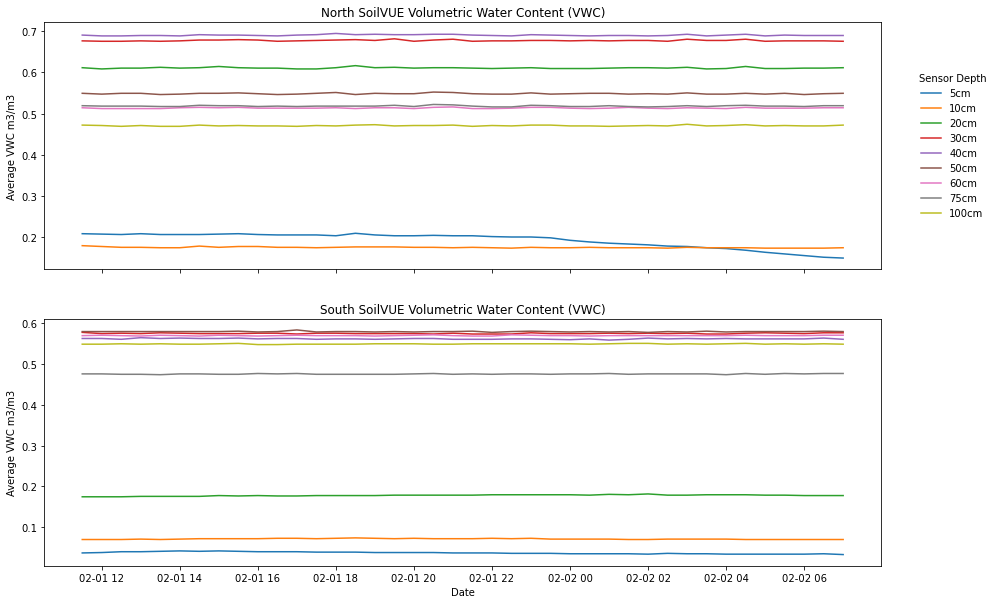

In [10]:
#met30[VWC_N_Fields].plot(xlabel="Date", ylabel=("VWC"), title="North SoilVUE VWC")
#met30[VWC_S_Fields].plot(xlabel="Date", ylabel=("VWC"), title="South SoilVUE VWC")

fix, ax = plt.subplots(2,1,sharex=True)

for field in VWC_N_Fields:
    ax[0].plot(met30.index, met30[field], label=field.replace("_","").replace("Avg","").replace("VWC","").replace("N",""))
    
for field in VWC_S_Fields:
    ax[1].plot(met30.index, met30[field], label=field.replace("_","").replace("Avg","").replace("VWC","").replace("S",""))
    
ax[1].set_xlabel("Date")
ax[0].set_ylabel("Average VWC m3/m3")
ax[1].set_ylabel("Average VWC m3/m3")
ax[0].set_title("North SoilVUE Volumetric Water Content (VWC)")
ax[1].set_title("South SoilVUE Volumetric Water Content (VWC)")
ax[0].legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, fancybox=False, frameon=False, 
             title = "Sensor Depth")
plt.show()